In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate synthetic time series
For experimentation purpose only!


In [29]:
# generate simple synthetic timeseries that has trend, seasonality and residual components.
# Basically:  a * np.sin(2 * np.pi * t / N) + b * t + noise

np.random.seed(123)



total_points = 365 * 4
time = np.arange(total_points)

# seasonality component
def complex_seasonality(time, configs):
    seasonality = np.zeros_like(time, dtype=float) 
    for amplitude, period, phase_shift in configs:
        seasonality += (amplitude * (np.sin((2 * np.pi * time / period) + phase_shift) + 1)/2 + 0.001*time)**2
        seasonality += amplitude * (np.cos((2 * np.pi * time / period) + phase_shift) + 1)/2

    return seasonality

# config: (amplitude, period, phase_shift)
seasonality_configs = [
    (2, 365/6, 0),  # Main yearly seasonality
    (1, 365/8, np.pi/4),  # Sub-seasonality with a different period and phase
    (0.5, 365/10, np.pi/2),  # Another layer of sub-seasonality
]

seasonality = complex_seasonality(time, seasonality_configs)

# trend component
trend_slope = 0.001
trend = trend_slope * time


# residual component
noise_level = 0.8
residual = np.random.normal(loc=1, scale=noise_level, size=total_points)



In [30]:
df = pd.DataFrame(zip(trend, seasonality, residual), columns=['trend', 'seasonality', 'residual'])
df['DateTime'] = pd.date_range(start='2010-01-01', periods=total_points, freq='D')
df['Value'] = df['trend'] + df['seasonality'] + df['residual']

df


,trend,seasonality,residual,DateTime,Value
0,0.000,5.082107,0.131496,2010-01-01,5.213602
1,0.001,5.279406,1.797876,2010-01-02,7.078282
2,0.002,5.463582,1.226383,2010-01-03,6.691965
3,0.003,5.631210,-0.205036,2010-01-04,5.429174
4,0.004,5.779161,0.537120,2010-01-05,6.320280
...,...,...,...,...,...
1455,1.455,14.655923,0.910324,2013-12-26,17.021247
1456,1.456,15.432413,1.064331,2013-12-27,17.952744
1457,1.457,16.201044,0.739367,2013-12-28,18.397411
1458,1.458,16.950705,-0.354763,2013-12-29,18.053942


Text(0.5, 1.0, '"Residual" of Synthetic Time Series')

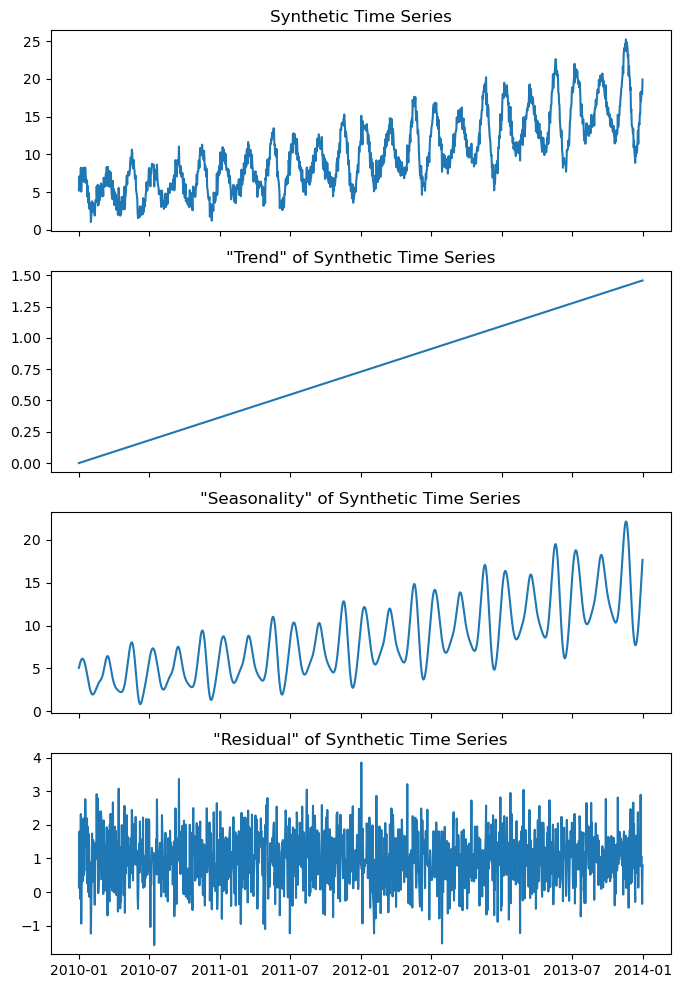

In [31]:
fig, axes = plt.subplots(figsize=(8, 12), nrows=4, ncols=1, sharex=True)

axes[0].plot(df['DateTime'], df['Value'])
axes[0].set_title('Synthetic Time Series')
axes[1].plot(df['DateTime'], df['trend'])
axes[1].set_title('"Trend" of Synthetic Time Series')
axes[2].plot(df['DateTime'], df['seasonality'])
axes[2].set_title('"Seasonality" of Synthetic Time Series')
axes[3].plot(df['DateTime'], df['residual'])
axes[3].set_title('"Residual" of Synthetic Time Series')
